# 3. Predictive models

In this section we will develop different kind of models exploiting the train-test approach.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from mlxtend.evaluate import lift_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.initializers import he_normal, glorot_normal
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1,l2

#from keras.utils import np_utils
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import Dropout
#from keras import optimizers

C:\Users\ANDREA\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ANDREA\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ANDREA\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ANDREA\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dty

In [14]:
data=pd.read_csv('Dataset_end.csv',sep=',',)
data.set_index('ID',inplace=True)

#### Reparametrization:

Arrangement of the variables to prepare the dataset for the modelling process:

In [16]:
cat=['job','marital','month','day_of_week','poutcome','pdays_new','education']

for i in cat: 
    data[i]=data[i].astype('category')
    
for i in data[cat]:
    data[i]=data[i].cat.codes
    
for i in cat: 
    data[i]=data[i].astype('category')

In [17]:
data['y']=pd.factorize(data['y'])[0]
data['contact']=pd.factorize(data['contact'])[0]

#### Prediction goal

The goal of our analysis is to built a predictive model, able to classify well all the y's but with a focus on the maximization of the precision of 1 ('yes'). 

Precision is a valid choice of evaluation metric when we want to assess our prediction performances.
This choice was made to avoid future useless expenditure in marketing for people that would not buy the product, above all because the current campaign seems not to be quite effective (see EDA analysis).

The metrics that we used to evaluate all the models below are:
- **AUC**: it evaluates the overall performance of the model;
- **Precision** for the positive class ('yes'): it evaluates the correct prediction of 1 (e.g. given a precision value of 80% means that, when the prediction of a client successfully buy a banking product, it is correct 80% of the time);
- **Recall** for the positive class ('yes'): it evaluates how many 1's the classifier identifies among all the 1's present in the test set (e.g. given a value of 80%, it correctly identifies 80% of all *yes* response present);
- **F1 score**: it is the harmonic average of precision and recall;
- **Accuracy**: it sums up the ability of the model to catch the right category of the response for each observation;
- **Lift score**: it compares model predictions to randomly generated predictions;

All of these metrics, except the AUC, are dependent on the choice of the threshold. Thus, the definition of this parameter will be made according to the goal define above.




## 3.1 Parametric approach

#### One hot encoding:

In [18]:
data_dummy=pd.get_dummies(data)

#### Avoid correlations:

From the first report (1.2.6)

We decided to avoid: emp.var.rate, because it has correlations above 0.7 with the other three socio-economic variables and nr.employed, instead of euribor3m, because it is not strickly related to the banking context.

In [19]:
data_glm=data_dummy.drop(['emp.var.rate','nr.employed'], axis=1)

### 3.1.1 Logistic regression

We split in train and test:

In [20]:
Y=data_glm['y']
X=data_glm.drop('y',axis=1)
x_train_glm,x_test_glm,y_train_glm,y_test_glm=train_test_split(X,Y, test_size=0.2, random_state=123)

In [22]:
glm=LogisticRegression(random_state=10091995)
glm.fit(x_train_glm,y_train_glm)
proba_train= [y for (x, y) in glm.predict_proba(x_train_glm)]
glm_proba= [y for (x, y) in glm.predict_proba(x_test_glm)]
lr_auc = roc_auc_score(y_test_glm, glm_proba)

C:\Users\ANDREA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


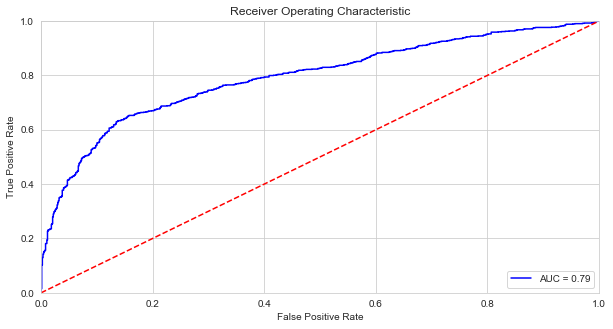

In [23]:
sns.set_style('whitegrid')
fpr, tpr, threshold = roc_curve(y_test_glm,glm_proba)
roc_auc = auc(fpr, tpr)
fig=plt.subplots(figsize=(10,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The overall quality of our logistic regression is indicated by the AUC score(0.79).


In [24]:
glm_pred=glm.predict(x_test_glm)

In [25]:
def report (y_t,y_pred,y_proba,c):
    auc=roc_auc_score(y_t,y_proba)
    p=precision_score(y_t,y_pred)
    r=recall_score(y_t,y_pred)
    f1 =(2 * (p* r)) / (p+ r)
    a=accuracy_score(y_t,y_pred)
    score=np.array([auc,p,r,f1,a]).round(2)
    table=pd.DataFrame(score,index=['AUC','Prec','Rec','F1','Acc'],columns=[c])
    return(table)

In [26]:
GLM=report(y_test_glm,glm_pred,glm_proba,'GLM')
GLM

,GLM
AUC,0.79
Prec,0.78
Rec,0.67
F1,0.72
Acc,0.73


With a threshold of 0.5:

- Our model has a precision of 0.78;
- Our model has a recall of 0.67, in other words;
- Our model has a F1 (the harmonic average of precision an recall) of 0.72;
- Our model accuracy is 73%;
 

The choice of 0.5 can be a good compromise, given the fact that the dataset is perfectly balanced among the response. <br>

Despite that we can decide not to use this threshold, because our aim is to maximise the precision of 1 ('yes'). 

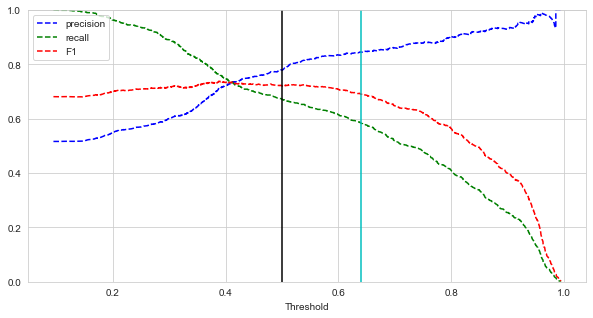

In [27]:
prec, rec, tre = precision_recall_curve(y_test_glm,glm_proba)
F1 =(2 * (prec* rec)) / (prec+ rec)
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds, f1,x=0.5):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.plot(thresholds, f1[:-1], 'r--', label = 'F1')
    plt.axvline(x=0.5,c='k')
    plt.axvline(x=x,c='c')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    
fig=plt.subplots(figsize=(10,5))
plot_prec_recall_vs_tresh(prec, rec, tre,F1,0.64)
plt.show()

From the plot above it is possible to select a set of thresholds (greater than 0.5), that can maximize the precision of the yes predictions. 

In [28]:
glm_pred2=[]
for i in glm_proba:
    if i>0.6:
        i=1
    else:
        i=0
    glm_pred2.append(i)

In [29]:
GLM=report(y_test_glm,glm_pred2,glm_proba,'GLM')
GLM

,GLM
AUC,0.79
Prec,0.83
Rec,0.61
F1,0.71
Acc,0.74


We use the threshold of 0.6, that ensure an 83% of good classification of 1.

This logic that drives our prediction process will be used for all the following non parametric models.


## 3.2  Non-parametric approach

#### Normalization:
We use the normalize dataset to exploit the non parametric approaches 

In [30]:
data_norm=data.copy()

numi=['age','campaign','cons.conf.idx','cons.price.idx','emp.var.rate','euribor3m','nr.employed','previous']
data_norm[numi]=preprocessing.normalize(data[numi])

#### Target Encoding:

There are lots of categorical variables in our dataset. Making One Hot Encoding for non-parametric model, lead to an increase of the number of features affecting the quality of our classifier. Therefore we decided to use the 'Target Encoding' method to avoid this issue.

In [31]:
encoder=ce.TargetEncoder(smoothing=5)

The choice of a smoothing parameter was made because we wanted to be sure to not cause overfitting.

In [32]:
Y=data_norm['y']
X=data_norm.drop('y',axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=123)

In [33]:
c=['job','marital','month','day_of_week','poutcome','pdays_new','education','loan','housing','contact']
x_train[c]=encoder.fit_transform(x_train[c],y_train)
x_test[c]=encoder.transform(x_test[c])

C:\Users\ANDREA\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### 3.2.1 Decision tree

The first step we made is the cross validation to set the best combination of parameters:

In [34]:
dt = DecisionTreeClassifier(random_state=123)
params = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(4, 15, 2), 'min_samples_leaf': [0.1, 0.01, 0.001]}
cv_tuning = RandomizedSearchCV(dt, params, random_state=123, scoring='accuracy', return_train_score=True, cv=5, n_iter=20)
cv_tuning.fit(x_train, y_train)

print(cv_tuning.best_params_,' ',cv_tuning.best_score_)



{'min_samples_leaf': 0.001, 'max_depth': 6, 'criterion': 'entropy'}   0.7316258351893096


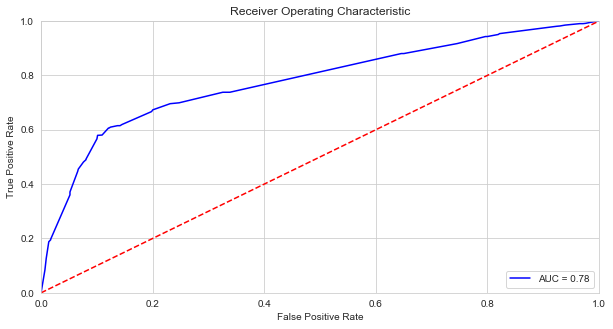

In [35]:
dt = DecisionTreeClassifier(random_state=123,min_samples_leaf=0.001,max_depth=6,criterion='entropy')
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_proba = [y for (x, y) in dt.predict_proba(x_test)]


fpr, tpr, threshold = roc_curve(y_test,dt_proba)
roc_auc = auc(fpr, tpr)

fig=plt.subplots(figsize=(10,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The overall AUC is 0.78

In [36]:
report(y_test,dt_pred,dt_proba,'DT')

,DT
AUC,0.78
Prec,0.78
Rec,0.67
F1,0.72
Acc,0.73


With a threshold of 0.5:

- Our model obtains a 78% of precision in the classification of yes;
- Our model has a 67 % of recall in the classification of yes;
- An F1 score of 0.72;
- An overall avvuracy of 73%;

We can decide to change the threshold:

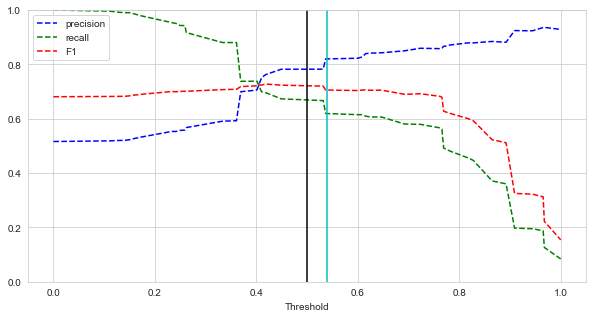

In [37]:
prec, rec, tre = precision_recall_curve(y_test,dt_proba)
F1 =(2 * (prec* rec)) / (prec+ rec)
fig=plt.subplots(figsize=(10,5))
plot_prec_recall_vs_tresh(prec, rec, tre,F1,0.54)
plt.show()

In [38]:
dt_pred2=[]
for i in dt_proba:
    if i>0.54:
        i=1
    else:
        i=0
    dt_pred2.append(i)

In [39]:
DT=report(y_test,dt_pred2,dt_proba,'DT')
DT

,DT
AUC,0.78
Prec,0.82
Rec,0.61
F1,0.70
Acc,0.73


With a threshold of 0.54, we obtain an increse in the precision score (82%) and an overall good performance for the other indeces.

### 3.2.3 Random forest

The first step we made is the cross validation to set the best combination of parameters:

In [40]:
rf = RandomForestClassifier(random_state=33)
params = {'n_estimators':[50,100,150,200],'criterion': ['gini', 'entropy'], 'max_depth': np.arange(2, 6), 'min_samples_leaf': np.logspace(-1, -3, 3),'max_features': ['sqrt', 0.2, 0.5]}
cv_tuning = RandomizedSearchCV(rf, params, random_state=122223, scoring='accuracy', return_train_score=True, cv=5, n_iter=20)
cv_tuning.fit(x_train,y_train)
print(cv_tuning.best_score_,' ',cv_tuning.best_params_)


0.734966592427617   {'n_estimators': 150, 'min_samples_leaf': 0.001, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy'}


From the cv we obtained the best model, that is retrained in order to make the predictions on the test set:

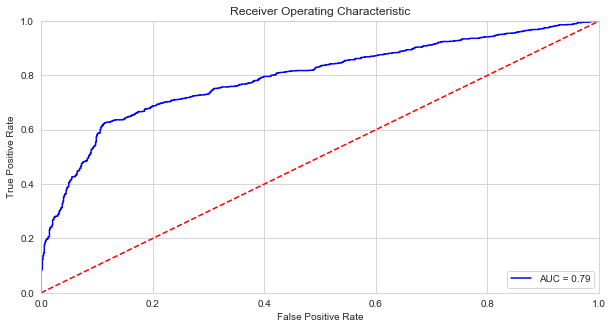

In [41]:
rf = RandomForestClassifier(random_state=33, n_estimators=150, min_samples_leaf=0.001,max_features='sqrt',max_depth=5,criterion='entropy')
rf.fit(x_train,y_train)
rf_pred= rf.predict(x_test)
rf_proba = [y for (x, y) in rf.predict_proba(x_test)]

fig=plt.subplots(figsize=(10,5))
fpr, tpr, threshold = roc_curve(y_test,rf_proba)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The overall AUC of the model is 0.79.

In [42]:
RF=report(y_test,rf_pred,rf_proba,'RF')
RF

,RF
AUC,0.79
Prec,0.79
Rec,0.67
F1,0.73
Acc,0.74


With a threshold of 0.5:

- Our model has a precision of 0.79 in the classification of yes;
- Our model has a recall of 0.67 in the classification of yes;
- Our model has a F1 (the harmonic average of precision an recall) of 0.73 in the classification of yes;
- Our model accuracy is 74%;

We can decide to change the threshold:

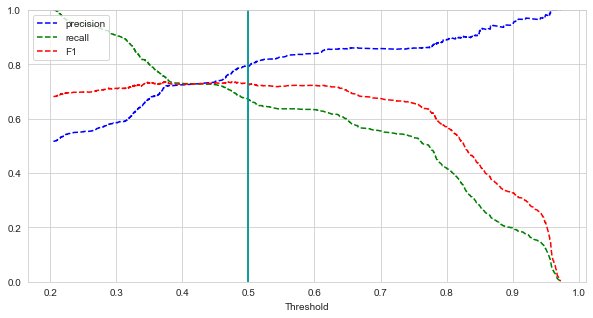

In [43]:
fig=plt.subplots(figsize=(10,5))
prec, rec, tre = precision_recall_curve(y_test,rf_proba)
F1 =(2 * (prec* rec)) / (prec+ rec)
plot_prec_recall_vs_tresh(prec, rec, tre,F1)
plt.show()

From the graph, we decide not to change the threshold because there is a constant behaviour of the precision til the 0.7 and a decrease, in the same interval, of the other two indeces.

### 3.2.4 Gradient Boosting

In [44]:
gb = GradientBoostingClassifier(random_state=123)

params = {'learning_rate': np.logspace(-1, -4, 4),'n_estimators':[50, 100, 150,200],'min_samples_leaf': np.logspace(-1, -4, 4), 'max_features': ['sqrt', 0.2, 0.3, 0.5, 0.7, 0.8], 'max_depth':[2,3,4,5],'subsample': [0.4, 0.8, 1]}
cv_tuning = RandomizedSearchCV(gb, params, random_state=123, scoring='accuracy', return_train_score=True, cv=5, n_iter=20)

cv_tuning.fit(x_train, y_train)

print(cv_tuning.best_params_,' ',cv_tuning.best_score_)

{'subsample': 0.8, 'n_estimators': 200, 'min_samples_leaf': 0.001, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.01}   0.7430400890868597


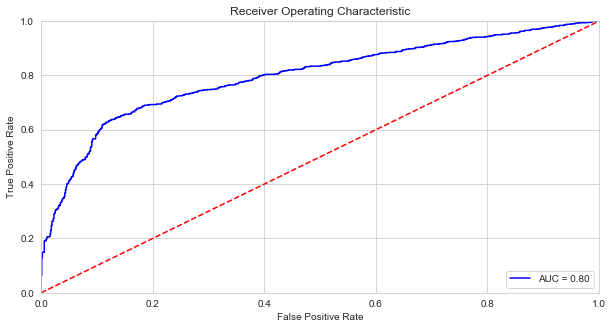

In [45]:
gb = GradientBoostingClassifier(random_state=123,subsample=0.8,n_estimators=200,min_samples_leaf=0.001,max_features='sqrt',max_depth=5,learning_rate=0.01)
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
gb_proba = [y for (x, y) in gb.predict_proba(x_test)]

fig=plt.subplots(figsize=(10,5))
fpr, tpr, threshold = roc_curve(y_test,gb_proba)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The overall accuracy is 0.80.

In [46]:
GB=report(y_test,gb_pred,gb_proba,'GB')
GB

,GB
AUC,0.80
Prec,0.81
Rec,0.67
F1,0.74
Acc,0.75


With a threshold of 0.5:

- Our model has a precision of 0.80 in the classification of yes;
- Our model has a recall of 0.67 in the classification of yes;
- Our model has a F1 (the harmonic average of precision an recall) of 0.73 in the classification of yes;
- Our model accuracy is 75%;

We can decide to change the threshold:

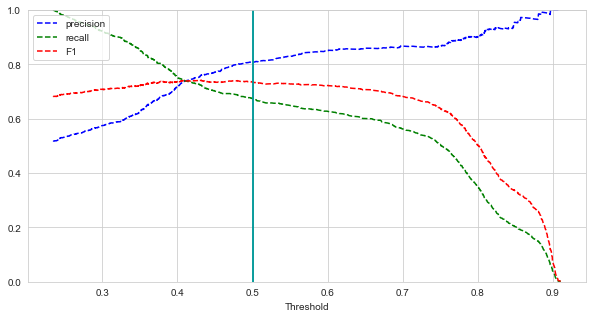

In [47]:
fig=plt.subplots(figsize=(10,5))
prec, rec, tre = precision_recall_curve(y_test,gb_proba)
F1 =(2 * (prec* rec)) / (prec+ rec)
plot_prec_recall_vs_tresh(prec, rec, tre,F1)
plt.show()

The threshold will be set to 0.5, because also in this case it permits to follow our goal, without worsening the overall performance.

### 3.2.5 Considerations

In [49]:
SCORE=GLM.join([DT,RF,GB])
SCORE

,GLM,DT,RF,GB
AUC,0.79,0.78,0.79,0.80
Prec,0.83,0.82,0.79,0.81
Rec,0.61,0.61,0.67,0.67
F1,0.71,0.70,0.73,0.74
Acc,0.74,0.73,0.74,0.75


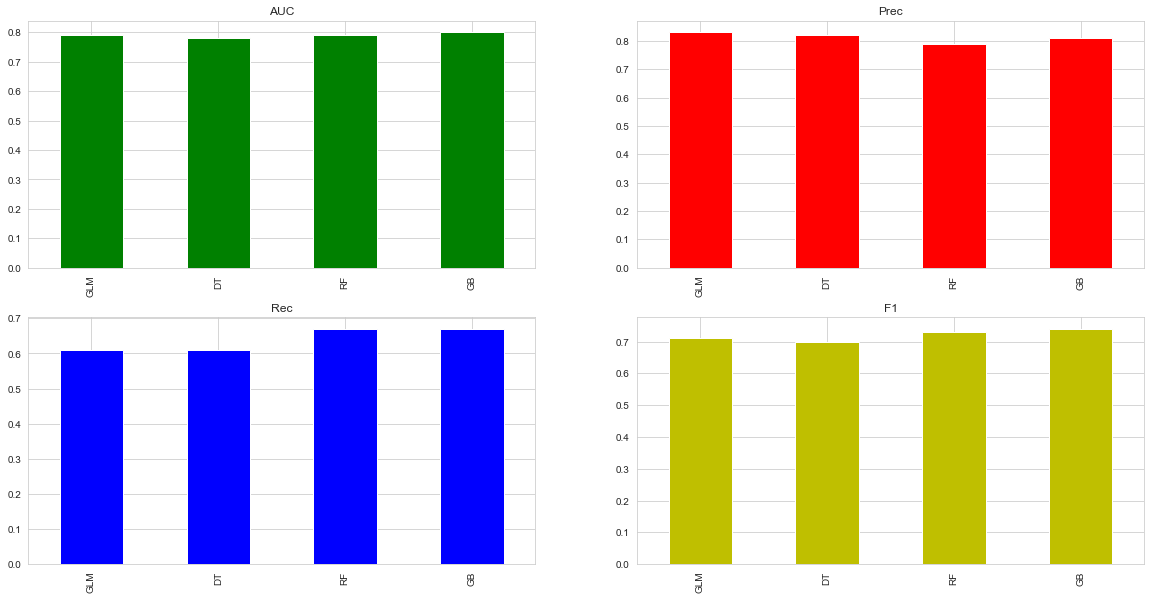

In [50]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(20,10))

SCORE.loc['AUC',:].plot.bar(ax=ax1,title='AUC',color='g')
SCORE.loc['Prec',:].plot.bar(ax=ax2,title='Prec',color='r')
SCORE.loc['Rec',:].plot.bar(ax=ax3,title='Rec',color='b')
SCORE.loc['F1',:].plot.bar(ax=ax4,title='F1',color='y')
plt.show()

Observing the plot, it is possible to see that the best precision for the 1's is obtained by the logistic model (83%). Despite this fact, the logistic model is not the best for the other three indeces, that show the overall quality of the model. 
The model that overperforms all the other models in AUC, Recall and F1 is the Gradient Boosting, reaching also a satisfying level for the precision:

In [51]:
print('The indeces for the GB model are:',GB,sep='\n')

The indeces for the GB model are:
        GB
AUC   0.80
Prec  0.81
Rec   0.67
F1    0.74
Acc   0.75


## 3.3 Deeper evaluation: Lift analysis 

In [38]:
def cum_lift(proba,y_t):
    quantiles = list(np.quantile(proba, q=np.linspace(0,1,5)))
    d_perc = pd.DataFrame(columns=['P_inf', 'P_sup', 'P_avg', 'Attempts', 'Success','Success_perc']) 
    for i in range(len(quantiles) - 1):
        p = [x for x in proba if quantiles[i+1] > x >= quantiles[i]]
        q = y_t.loc[[quantiles[i+1] > x >= quantiles[i] for x in proba]]
        d_perc.loc[i+1] = [quantiles[i], quantiles[i+1], np.mean(p), q.count(), q.sum(), q.mean()]
    d_perc.sort_values('P_inf', ascending=False, inplace=True)
    d_perc['Attempts_cum'] = d_perc['Attempts'].cumsum()
    d_perc['Success_cum'] = d_perc['Success'].cumsum()
    d_perc['Captured_resp'] = d_perc['Success'] / d_perc.loc[1, 'Success_cum']
    d_perc['Captured_resp_cum'] = d_perc['Success_cum'] / d_perc.loc[1, 'Success_cum']
    d_perc['Lift'] = d_perc['Success'] / (d_perc['Attempts'] * y_t.mean())
    d_perc['Lift_cum'] = d_perc['Success_cum'] / (d_perc['Attempts_cum'] * y_t.mean())
    return(d_perc[['Success_perc','Captured_resp_cum','Lift_cum']])

def gain_plot(model):
    quantile=[0.0,0.25,0.5,0.75,1]
    v=0
    l=np.array(model['Captured_resp_cum'])
    X = np.insert(l,0,v, axis=0)
    plt.xlim([0, 1])
    plt.title('Cumulative gains chart')
    plt.xlabel('% customers contacted')
    plt.ylabel('% customers reached')
    plt.ylim([0, 1])
    plt.plot([0, 1], [0, 1],'r--',label='Baseline')
    plt.plot(quantile,X,label='Gain')
    plt.legend(loc="upper left")
    plt.show()
    
def lift_plot(model):
    quantile=[0.25,0.5,0.75,1]
    l=np.array(model['Lift_cum'])
    plt.xlim([0.25, 1])
    plt.title('Cumulative lift chart')
    plt.xlabel('% customers contacted')
    plt.ylabel('Lift')
    plt.axhline(y=1,c='r',ls='--',label='Baseline')
    plt.plot(quantile,l,label='Lift')
    plt.legend(loc="upper right")
    plt.show()
    
def wtf_plot(model,color):
    plt.bar(['1st','2nd','3rd','4th'],np.array(model['Success_perc'])*100,color=color)
    a=y_test.mean()*100
    plt.axhline(y=a,c='k',ls='--',label='Overall response rate')
    plt.legend(loc="upper right")
    

We decided to split the client population into four groups (based on quartiles, sorted from more probable to the less probable that clients purchase banking products): Loyal clients (4), Clients (3), Possible clients (2), Newer (1). <br>
Thanks to this ripartition, we will be able to build three indeces that represent the ability of the model to catch people that purchase banking products.
The indeces are: 
- Percentage of success: it is computed for each class and gives the proportion of people that will become a client;
- Cumulative gain score: it is the percentage of the overall number of cases in a given category "gained" by targeting a percentage of the total number of cases;
- Cumulative lift score: it is the cumulative score of how much better one can expect to perform with the predictive model with respect to not using the model;

In [39]:
print('Logistic evaluation:')
logit_report=cum_lift(glm_proba,y_test)
display(logit_report)
print('Decision tree evaluation:')
dt_report=cum_lift(dt_proba,y_test)
display(dt_report)
print('Random forest evaluation:')
rf_report=cum_lift(rf_proba,y_test)
display(rf_report)
print('Gradient Boosting evaluation:')
gb_report=cum_lift(gb_proba,y_test)
display(gb_report)

Logistic evaluation:


,Success_perc,Captured_resp_cum,Lift_cum
4,0.879464,0.425486,1.703903
3,0.594655,0.713823,1.427696
2,0.347439,0.882289,1.175990
1,0.242762,1.000000,0.999478


Decision tree evaluation:


,Success_perc,Captured_resp_cum,Lift_cum
4,0.868217,0.395760,1.682112
3,0.544355,0.713781,1.329654
2,0.321951,0.869258,1.105820
1,0.264916,1.000000,0.960795


Random forest evaluation:


,Success_perc,Captured_resp_cum,Lift_cum
4,0.883929,0.427646,1.712552
3,0.601336,0.719222,1.438495
2,0.325167,0.876890,1.168793
1,0.253898,1.000000,0.999478


Gradient Boosting evaluation:


,Success_perc,Captured_resp_cum,Lift_cum
4,0.890625,0.430886,1.725526
3,0.612472,0.727862,1.455774
2,0.318486,0.882289,1.175990
1,0.242762,1.000000,0.999478


From the tables above, we decided to select the two best models, according to the cumulative of the lift score : Logistic and Gradient boosting. <br>
Although the models seem to be very similar,this choice is made in terms of 1's prediction ability.

Logistic:


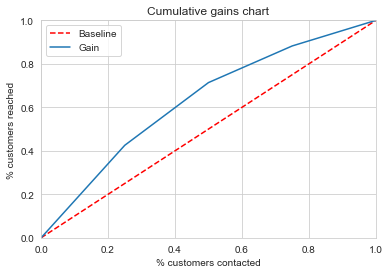

Gradient Boosting:


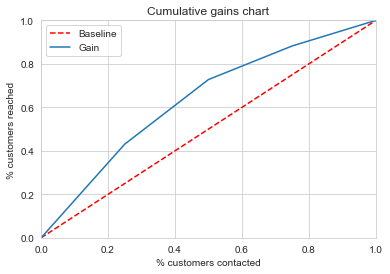

In [40]:
print('Logistic:')
gain_plot(logit_report)
print('Gradient Boosting:')
gain_plot(gb_report)

Logistic:


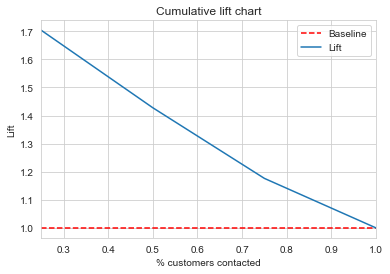

Gradient Boosting:


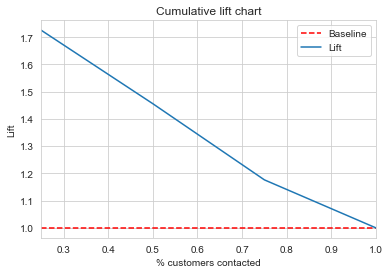

In [41]:
print('Logistic:')
lift_plot(logit_report)
print('Gradient Boosting:')
lift_plot(gb_report)

Logistic waterfall:


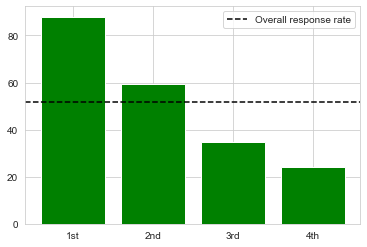

In [42]:
print('Logistic waterfall:')
wtf_plot(logit_report,'g')

Gradient Boosting waterfall:


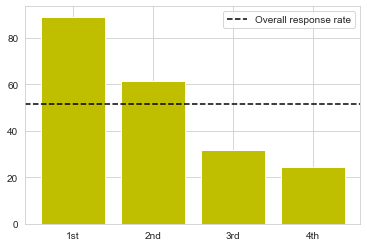

In [43]:
print('Gradient Boosting waterfall:')
wtf_plot(gb_report,'y')

The comparison between Logistic and GB demonstrate again the similarity between the two models, even if we display all the three indeces. <br>
The first type of graph describe how many 1's we are able to predict w.r.t the total 1's in the test set. For example if the bank contacts the first 20% of people that belongs to the 'loyal clients' group, it is able to reach more than 30% of customer with a purchase.
The second plot shows how better is the model prediction respect to the prediction made randomly.
The third and last plot shows the response rate for each group of client, compared with the overall response rate (51%).


## 3.4 Conclusions

At the end of the analysis, it is possible to say that:

- The threshold provides a tool that guarantees to establish to which category the customer belongs to. The choice of the cutoff is driven to a good classification of 1 in order to don't waste financial resources during the implementation of future marketing campaigns. The best models, following this approach, are: logistic and gradient boosting;

- The use of lift score and cumulative gains, applied to the same model of the previous section, identifies the ability of the classifier to allocate resources in a good manner. They allow to measure the model performance by using the actual response rates to see how much the predictive model would have helped in this situation. The information can be used to determine whether we should use this model or one similar to it in the future.

- Furthermore, we need to take into account that we have lost an important part of information due to data cleaning( for example, we have reparametrize pdays into 4 catgories and we have removed default variable). For this reason accuracy might not reach optimal levels (all models under 80% of accuracy).

- For future implementation in business context, in order to best exploit the predictive capabilities of our model, it would be strongly suggested to enrich data features. 